In [1]:
# Dependencies and Setup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
from scipy import stats

weather_fire_2013_df = pd.read_csv('outputs/fireweather2013.csv', thousands=',')
fire_2013_df = pd.read_csv('outputs/fireweather2013clean.csv', thousands=',')

weather_fire_2015_df = pd.read_csv('outputs/fireweather2015.csv', thousands=',')
fire_2015_df = pd.read_csv('outputs/fireweather2015clean.csv', thousands=',')

weather_fire_2018_df = pd.read_csv('outputs_mergeable/weatherlat2018.csv', thousands=',')
fire_2018_df = pd.read_csv('outputs_mergeable/fire2018clean.csv', thousands=',')

weather_2013_full = pd.merge(weather_fire_2013_df, fire_2013_df, on="Latitude", how="outer")
#weather_2013_full.count()

weather_2015_full = pd.merge(weather_fire_2015_df, fire_2015_df, on="Latitude", how="outer")
#weather_2015_full.count()

weather_2018_full = pd.merge(weather_fire_2018_df, fire_2018_df, on="Latitude", how="outer")
#weather_2018_full.count()

In [2]:
weather_2013 = weather_2013_full.rename(columns={"Longitude_x": "Longitude", "Precipitation(MM)": "Precipitation"})
weather_2015 = weather_2015_full.rename(columns={"Longitude_x": "Longitude", "Precipitation(MM)": "Precipitation"})
weather_2018 = weather_2018_full.rename(columns={"Longitude_x": "Longitude", "Precipitation(MM)": "Precipitation"})

In [3]:
weather_2013 = weather_2013[["Name", "Latitude", "Longitude", "Acres Burned", "Date", "Temperature", "Humidity", "Precipitation", "Wind Speed", "Wind Gust"]]
weather_2013.head()

weather_2015 = weather_2015[["Name", "Latitude", "Longitude", "Acres Burned", "Date", "Temperature", "Humidity", "Precipitation", "Wind Speed", "Wind Gust"]]
weather_2015.head()

weather_2018 = weather_2018[["Name", "Latitude", "Longitude", "Acres Burned", "Date", "Temperature", "Humidity", "Precipitation", "Wind Speed", "Wind Gust"]]
weather_2018.head()
weather_2015.head()

,Name,Latitude,Longitude,Acres Burned,Date,Temperature,Humidity,Precipitation,Wind Speed,Wind Gust
0,Horse Fire,40.105882,-124.072042,146,8/18/15,77.0,73.0,0.0,3.0,5.0
1,Bald Fire,41.151300,-123.829200,20,6/10/15,65.0,82.0,0.0,5.0,8.0
2,Queen Fire,41.295667,-123.784067,158,7/24/15,78.0,67.0,0.0,3.0,5.0
3,Buck Fire,40.109300,-123.774000,16,7/28/15,90.0,52.0,0.0,6.0,11.0
4,Mendocino Lightning Fires,39.433010,-123.363160,50,7/30/15,91.0,55.0,0.7,4.0,6.0


In [4]:
weather_2013.dropna()
weather_2015.dropna()
weather_2018.dropna()

,Name,Latitude,Longitude,Acres Burned,Date,Temperature,Humidity,Precipitation,Wind Speed,Wind Gust
0,Aqueduct Fire,35.924360,-119.940830,30.0,2018-04-12,64.0,48.0,0.1,15.0,21.0
1,Haycamp Fire,35.966890,-121.281850,50.0,2018-02-07,68.0,58.0,0.0,5.0,9.0
2,Pleasant Fire,37.402080,-118.502350,2070.0,2018-02-18,47.0,35.0,0.1,11.0,16.0
3,Grant Fire,37.738350,-121.603900,12.0,2018-05-14,74.0,67.0,0.0,5.0,7.0
4,Patterson Fire,33.629240,-117.059920,1261.0,2018-05-17,67.0,65.0,0.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...
299,Sierra Fire,34.180750,-117.431840,147.0,2018-11-13,70.0,11.0,0.0,8.0,11.0
300,Niles Fire,37.611580,-121.941820,20.0,2018-11-14,71.0,22.0,0.0,3.0,4.0
301,Briggs Fire,34.301667,-119.099167,150.0,2018-11-15,70.0,38.0,0.0,5.0,8.0
302,Peak Fire,34.267348,-118.643816,186.0,2018-11-12,68.0,19.0,0.0,9.0,15.0


In [5]:
weather_2013["Date"]=pd.to_datetime(weather_2013["Date"])
weather_2015["Date"]=pd.to_datetime(weather_2015["Date"])
weather_2018["Date"]=pd.to_datetime(weather_2018["Date"])

In [6]:
#weather_2015["Acres Burned"]=pd.to_numeric(weather_2015["Acres Burned"])

In [7]:
#print(weather_2013.dtypes)
#print(weather_2015.dtypes)
print(weather_2018.dtypes)

Name                     object
Latitude                float64
Longitude               float64
Acres Burned            float64
Date             datetime64[ns]
Temperature             float64
Humidity                float64
Precipitation           float64
Wind Speed              float64
Wind Gust               float64
dtype: object


In [8]:
# southern lat = 32.82, northern lat  = 41.77

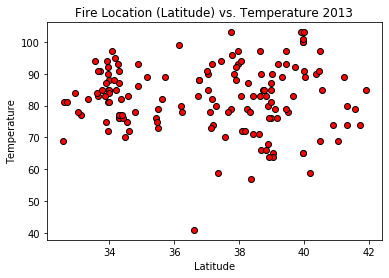

In [9]:
# Create a Scatter Plot for temperature vs fire location - to show if lat/long has an impact (probably won't)
x_values = weather_2013['Latitude']
y_values = weather_2013['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location (Latitude) vs. Temperature 2013')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(False)
plt.savefig("outputs/latitude_vs_temp_2013.png")
plt.show()

In [10]:
# western lon = 124, eastern lon  = 114

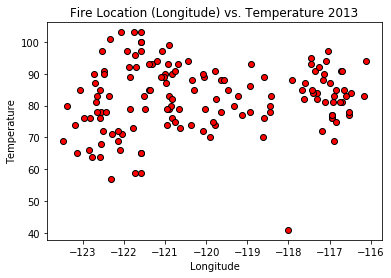

In [11]:
# Create a Scatter Plot for temperature vs fire location - to show if lat/long has an impact (probably won't)
x_values = weather_2013['Longitude']
y_values = weather_2013['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location (Longitude) vs. Temperature 2013')
plt.xlabel('Longitude')
plt.ylabel('Temperature')
plt.grid(False)
plt.savefig("outputs/longitude_vs_temp_2013.png")
plt.show()

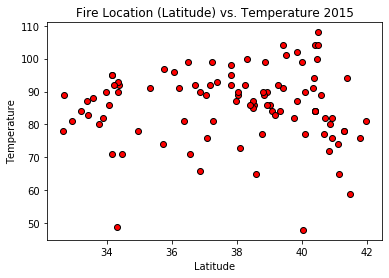

In [12]:
# Create a Scatter Plot for temperature vs fire location - to show if lat/long has an impact (probably won't)
x_values = weather_2015['Latitude']
y_values = weather_2015['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location (Latitude) vs. Temperature 2015')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(False)
plt.savefig("outputs/latitude_vs_temp_2015.png")
plt.show()

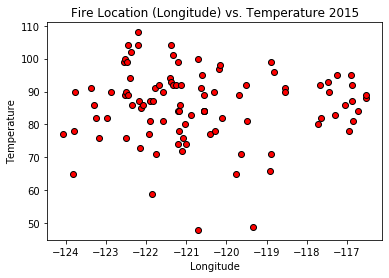

In [13]:
# Create a Scatter Plot for temperature vs fire location - to show if lat/long has an impact (probably won't)
x_values = weather_2015['Longitude']
y_values = weather_2015['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location (Longitude) vs. Temperature 2015')
plt.xlabel('Longitude')
plt.ylabel('Temperature')
plt.grid(False)
plt.savefig("outputs/longitude_vs_temp_2015.png")
plt.show()

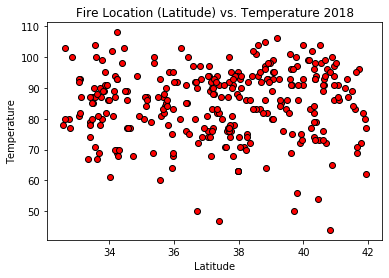

In [14]:
# Create a Scatter Plot for temperature vs fire location - to show if lat/long has an impact (probably won't)
x_values = weather_2018['Latitude']
y_values = weather_2018['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location (Latitude) vs. Temperature 2018')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(False)
plt.savefig("outputs/latitude_vs_temp_2018.png")
plt.show()

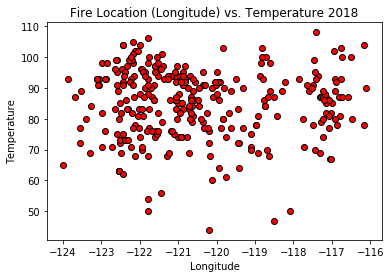

In [15]:
# Create a Scatter Plot for temperature vs fire location - to show if lat/long has an impact (probably won't)
x_values = weather_2018['Longitude']
y_values = weather_2018['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location (Longitude) vs. Temperature 2018')
plt.xlabel('Longitude')
plt.ylabel('Temperature')
plt.grid(False)
plt.savefig("outputs/longitude_vs_temp_2018.png")
plt.show()

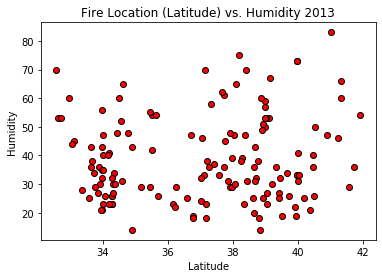

In [16]:
# Create a Scatter Plot for fire latitude vs humidity
x_values = weather_2013['Latitude']
y_values = weather_2013['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location (Latitude) vs. Humidity 2013')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(False)
plt.savefig("outputs/latitude_vs_humidty_2013.png")
plt.show()

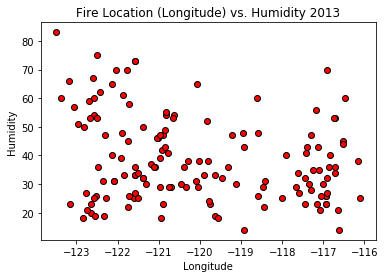

In [17]:
# Create a Scatter Plot for fire longitude vs humidity
x_values = weather_2013['Longitude']
y_values = weather_2013['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location (Longitude) vs. Humidity 2013')
plt.xlabel('Longitude')
plt.ylabel('Humidity')
plt.grid(False)
plt.savefig("outputs/longitude_vs_humidty_2013.png")
plt.show()

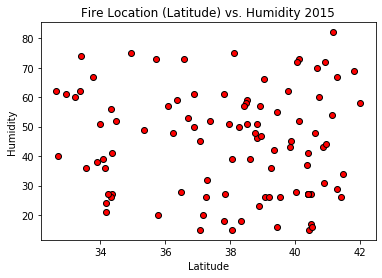

In [18]:
# Create a Scatter Plot for fire latitude vs humidity
x_values = weather_2015['Latitude']
y_values = weather_2015['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location (Latitude) vs. Humidity 2015')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(False)
plt.savefig("outputs/latitude_vs_humidty_2015.png")
plt.show()

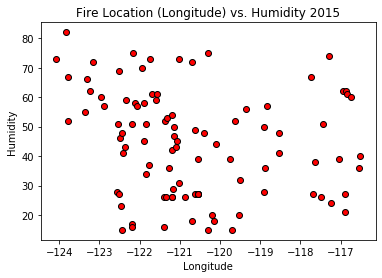

In [19]:
# Create a Scatter Plot for fire longitude vs humidity
x_values = weather_2015['Longitude']
y_values = weather_2015['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location (Longitude) vs. Humidity 2015')
plt.xlabel('Longitude')
plt.ylabel('Humidity')
plt.grid(False)
plt.savefig("outputs/longitude_vs_humidty_2015.png")
plt.show()

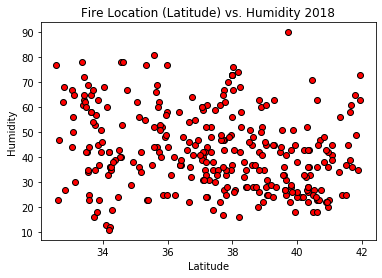

In [20]:
# Create a Scatter Plot for fire latitude vs humidity
x_values = weather_2018['Latitude']
y_values = weather_2018['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location (Latitude) vs. Humidity 2018')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(False)
plt.savefig("outputs/latitude_vs_humidty_2018.png")
plt.show()

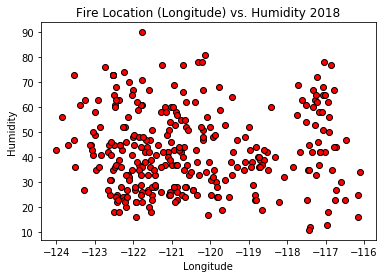

In [21]:
# Create a Scatter Plot for fire longitude vs humidity
x_values = weather_2018['Longitude']
y_values = weather_2018['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Fire Location (Longitude) vs. Humidity 2018')
plt.xlabel('Longitude')
plt.ylabel('Humidity')
plt.grid(False)
plt.savefig("outputs/longitude_vs_humidty_2018.png")
plt.show()

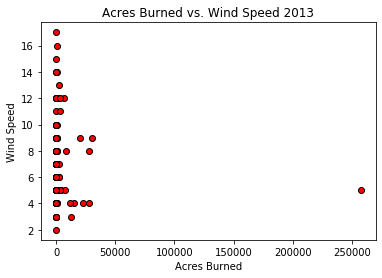

In [22]:
# Create a Scatter Plot for fire size vs wind 
x_values = weather_2013['Acres Burned']
y_values = weather_2013['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Acres Burned vs. Wind Speed 2013')
plt.xlabel('Acres Burned')
plt.ylabel('Wind Speed')
plt.grid(False)
plt.savefig("outputs/fire_size_vs_wind_speed_2013.png")
plt.show()

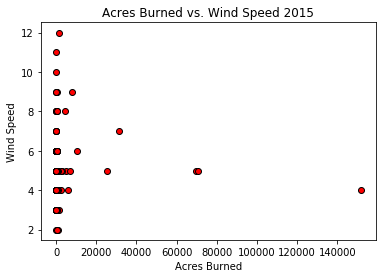

In [23]:
# Create a Scatter Plot for fire size vs wind 
#acres_group = weather_2015.groupby(["Acres Burned"])
x_values = weather_2015['Acres Burned']
y_values = weather_2015['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Acres Burned vs. Wind Speed 2015')
plt.xlabel('Acres Burned')
plt.ylabel('Wind Speed')
plt.grid(False)
plt.savefig("outputs/fire_size_vs_wind_speed_2015.png")
plt.show()

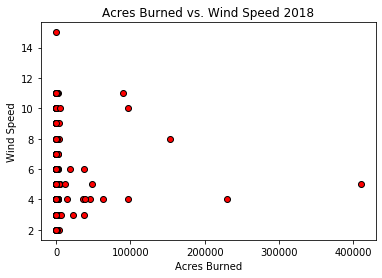

In [24]:
# Create a Scatter Plot for fire size vs wind 
x_values = weather_2018['Acres Burned']
y_values = weather_2018['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Acres Burned vs. Wind Speed 2018')
plt.xlabel('Acres Burned')
plt.ylabel('Wind Speed')
plt.grid(False)
plt.savefig("outputs/fire_size_vs_wind_speed_2018.png")
plt.show()

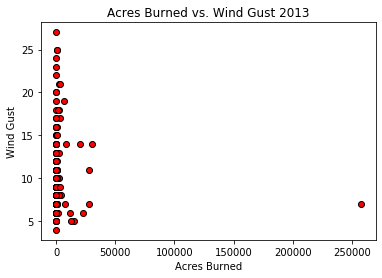

In [25]:
# Create a Scatter Plot for fire size vs wind gust
x_values = weather_2013['Acres Burned']
y_values = weather_2013['Wind Gust']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Acres Burned vs. Wind Gust 2013')
plt.xlabel('Acres Burned')
plt.ylabel('Wind Gust')
plt.grid(False)
plt.savefig("outputs/fire_size_vs_wind_gust_2013.png")
plt.show()

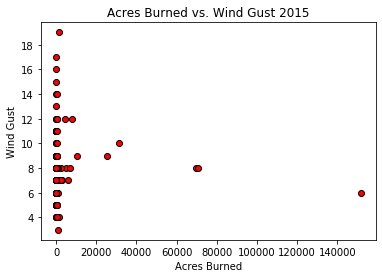

In [26]:
# Create a Scatter Plot for fire size vs wind gust
x_values = weather_2015['Acres Burned']
y_values = weather_2015['Wind Gust']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Acres Burned vs. Wind Gust 2015')
plt.xlabel('Acres Burned')
plt.ylabel('Wind Gust')
plt.grid(False)
plt.savefig("outputs/fire_size_vs_wind_gust_2015.png")
plt.show()

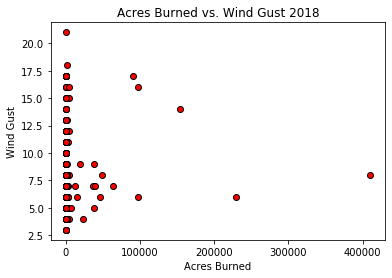

In [27]:
# Create a Scatter Plot for fire size vs wind gust
x_values = weather_2018['Acres Burned']
y_values = weather_2018['Wind Gust']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Acres Burned vs. Wind Gust 2018')
plt.xlabel('Acres Burned')
plt.ylabel('Wind Gust')
plt.grid(False)
plt.savefig("outputs/fire_size_vs_wind_gust_2018.png")
plt.show()

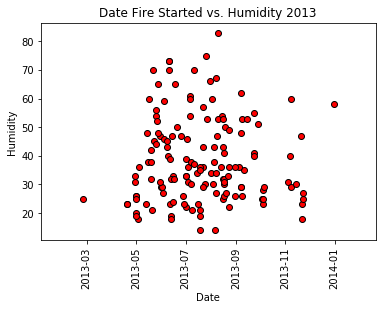

In [28]:
# Create a Scatter Plot for start date vs humidity
x_values = weather_2013['Date']
y_values = weather_2013['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Humidity 2013')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.xticks(rotation=90)
plt.grid(False)
plt.savefig("outputs/start_date_vs_humidity_2013.png")
plt.show()

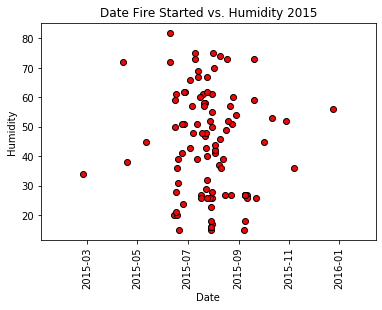

In [29]:
# Create a Scatter Plot for start date vs humidity
x_values = weather_2015['Date']
y_values = weather_2015['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Humidity 2015')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.xticks(rotation=90)
plt.grid(False)
plt.savefig("outputs/start_date_vs_humidity_2015.png")
plt.show()

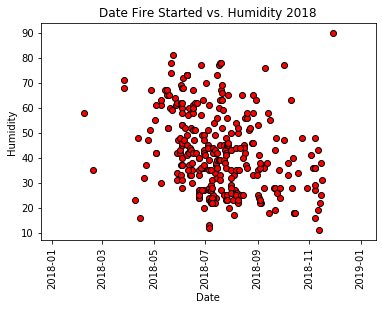

In [30]:
# Create a Scatter Plot for start date vs humidity
x_values = weather_2018['Date']
y_values = weather_2018['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Humidity 2018')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.xticks(rotation=90)
plt.grid(False)
plt.savefig("outputs/start_date_vs_humidity_2018.png")
plt.show()

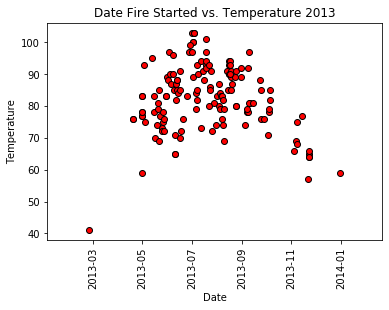

In [31]:
# Create a Scatter Plot for temperature vs start date - to show if temperature affects fire breaking out
x_values = weather_2013['Date']
y_values = weather_2013['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Temperature 2013')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=90)
plt.grid(False)
plt.savefig("outputs/start_date_vs_temp_2013.png")
plt.show()

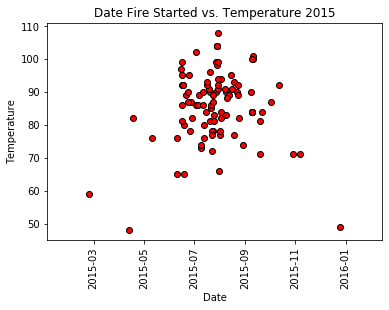

In [32]:
# Create a Scatter Plot for temperature vs start date - to show if temperature affects fire breaking out
x_values = weather_2015['Date']
y_values = weather_2015['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Temperature 2015')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=90)
plt.grid(False)
plt.savefig("outputs/start_date_vs_temp_2015.png")
plt.show()

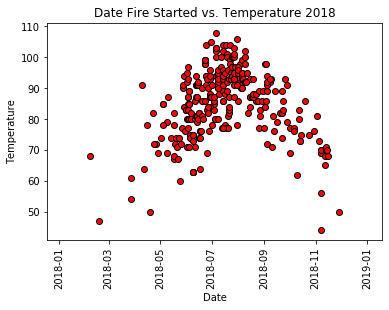

In [33]:
# Create a Scatter Plot for temperature vs start date - to show if temperature affects fire breaking out
x_values = weather_2018['Date']
y_values = weather_2018['Temperature']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Temperature 2018')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=90)
plt.grid(False)
plt.savefig("outputs/start_date_vs_temp_2018.png")
plt.show()

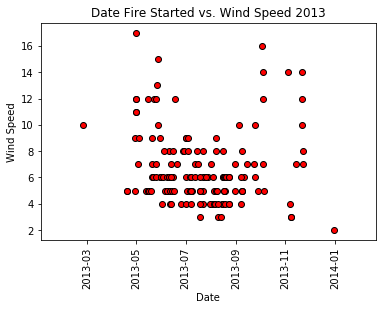

In [34]:
# Create a Scatter Plot for wind speed vs start date - to show if temperature affects fire breaking out
x_values = weather_2013['Date']
y_values = weather_2013['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Wind Speed 2013')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.xticks(rotation=90)
plt.grid(False)
plt.savefig("outputs/start_date_vs_wind_2013.png")
plt.show()

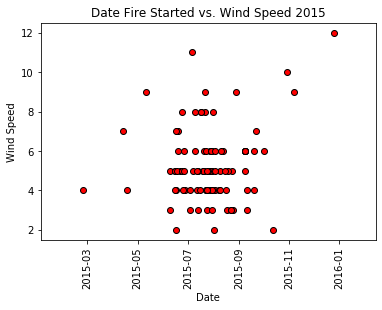

In [35]:
# Create a Scatter Plot for wind speed vs start date - to show if temperature affects fire breaking out
x_values = weather_2015['Date']
y_values = weather_2015['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Wind Speed 2015')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.xticks(rotation=90)
plt.grid(False)
plt.savefig("outputs/start_date_vs_wind_2015.png")
plt.show()

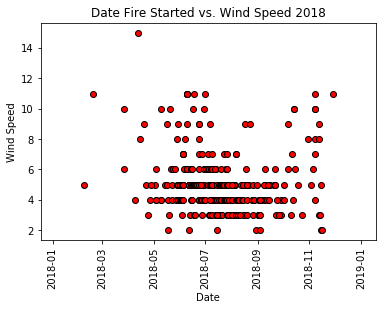

In [68]:
# Create a Scatter Plot for wind speed vs start date - to show if temperature affects fire breaking out
x_values = weather_2018['Date']
y_values = weather_2018['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.title(f'Date Fire Started vs. Wind Speed 2018')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.xticks(rotation=90)
plt.grid(False)
plt.savefig("outputs/start_date_vs_wind_2018.png")
plt.show()

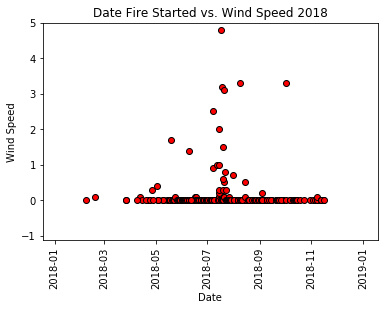

In [69]:
# Create a Scatter Plot for precipitation vs start date - to show if temperature affects fire breaking out
x_values = weather_2018['Date']
y_values = weather_2018['Precipitation']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
plt.ylim(top=5)  # adjust the top leaving bottom unchanged
plt.title(f'Date Fire Started vs. Wind Speed 2018')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.xticks(rotation=90)
plt.grid(False)
plt.savefig("outputs/precipitation_start_2018.png")
plt.show()

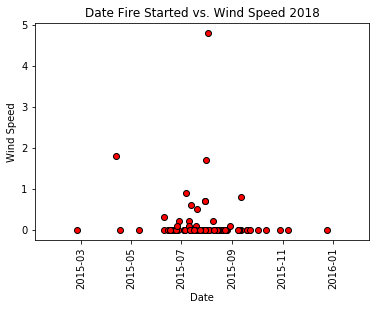

In [72]:

x_values = weather_2015['Date']
y_values = weather_2015['Precipitation']
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolor="black")
#plt.ylim(top=4)  # adjust the top leaving bottom unchanged
plt.title(f'Date Fire Started vs. Wind Speed 2018')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.xticks(rotation=90)
plt.grid(False)
plt.savefig("outputs/precipitation_start_2018.png")
plt.show()

In [37]:
weather_2013['Temperature'] = weather_2013['Temperature'].astype(float)
weather_2015['Temperature'] = weather_2015['Temperature'].astype(float)

In [38]:
f_2018 = weather_2018['Temperature']
w_2018 = f_2018.quantile([.25,.5,.75])
lowerq_2018 = w_2018[0.25]
upperq_2018 = w_2018[0.75]
iqr_2018 = upperq_2018-lowerq_2018


print(f"The lower quartile of tumor volume is: {lowerq_2018}")
print(f"The upper quartile of tumor volume is: {upperq_2018}")
print(f"The interquartile range of tumor volume is: {iqr_2018}")
print(f"The the median of tumor volume is: {w_2018[0.5]} ")

lower_bound_2018 = lowerq_2018 - (1.5*iqr_2018)
upper_bound_2018 = upperq_2018 + (1.5*iqr_2018)
print(f"Values below {lower_bound_2018} could be outliers.")
print(f"Values above {upper_bound_2018} could be outliers.")
outlier_2018 = f_2018.loc[(f_2018 < lower_bound_2018) | (f_2018 > upper_bound_2018)]
outlier_2018

The lower quartile of tumor volume is: 77.0
The upper quartile of tumor volume is: 93.0
The interquartile range of tumor volume is: 16.0
The the median of tumor volume is: 86.5 
Values below 53.0 could be outliers.
Values above 117.0 could be outliers.


2      47.0
19     50.0
292    44.0
296    50.0
Name: Temperature, dtype: float64

In [39]:
f_2015 = weather_2015['Temperature']
w_2015 = f_2015.quantile([.25,.5,.75])
lowerq_2015 = w_2015[0.25]
upperq_2015 = w_2015[0.75]
iqr_2015 = upperq_2015-lowerq_2015


print(f"The lower quartile of tumor volume is: {lowerq_2015}")
print(f"The upper quartile of tumor volume is: {upperq_2015}")
print(f"The interquartile range of tumor volume is: {iqr_2015}")
print(f"The the median of tumor volume is: {w_2015[0.5]} ")

lower_bound_2015 = lowerq_2015 - (1.5*iqr_2015)
upper_bound_2015 = upperq_2015 + (1.5*iqr_2015)
print(f"Values below {lower_bound_2015} could be outliers.")
print(f"Values above {upper_bound_2015} could be outliers.")
outlier_2015 = f_2015.loc[(f_2015 < lower_bound_2015) | (f_2015 > upper_bound_2015)]
outlier_2015

The lower quartile of tumor volume is: 80.25
The upper quartile of tumor volume is: 92.0
The interquartile range of tumor volume is: 11.75
The the median of tumor volume is: 87.0 
Values below 62.625 could be outliers.
Values above 109.625 could be outliers.


30    59.0
56    48.0
75    49.0
Name: Temperature, dtype: float64

In [40]:
f_2013 = weather_2013['Temperature']
w_2013 = f_2013.quantile([.25,.5,.75])
lowerq_2013 = w_2013[0.25]
upperq_2013 = w_2013[0.75]
iqr_2013 = upperq_2013-lowerq_2013


print(f"The lower quartile of tumor volume is: {lowerq_2013}")
print(f"The upper quartile of tumor volume is: {upperq_2013}")
print(f"The interquartile range of tumor volume is: {iqr_2013}")
print(f"The the median of tumor volume is: {w_2013[0.5]} ")

lower_bound_2013 = lowerq_2013 - (1.5*iqr_2013)
upper_bound_2013 = upperq_2013 + (1.5*iqr_2013)
print(f"Values below {lower_bound_2013} could be outliers.")
print(f"Values above {upper_bound_2013} could be outliers.")
outlier_2013 = f_2013.loc[(f_2013 < lower_bound_2013) | (f_2013 > upper_bound_2013)]
outlier_2013

The lower quartile of tumor volume is: 76.0
The upper quartile of tumor volume is: 90.0
The interquartile range of tumor volume is: 14.0
The the median of tumor volume is: 83.0 
Values below 55.0 could be outliers.
Values above 111.0 could be outliers.


0    41.0
Name: Temperature, dtype: float64

In [41]:
print(f_2018)
f_2018 = f_2018.dropna()

print(f_2015)
f_2015 = f_2015.dropna()

0      64.0
1      68.0
2      47.0
3      74.0
4      67.0
       ... 
301    70.0
302    68.0
303    68.0
304     NaN
305     NaN
Name: Temperature, Length: 306, dtype: float64
0     77.0
1     65.0
2     78.0
3     90.0
4     91.0
      ... 
94    81.0
95    84.0
96    88.0
97    89.0
98     NaN
Name: Temperature, Length: 99, dtype: float64


[Text(1, 0, '2013'), Text(2, 0, '2015'), Text(3, 0, '2018')]

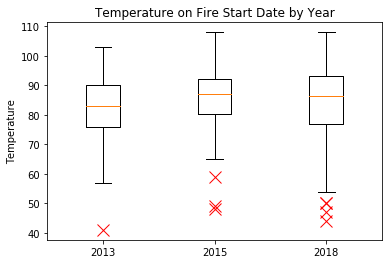

In [42]:
# Generate a box plot of the weather variables and fire size 
weather_variables = [f_2013, f_2015, f_2018]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Temperature')
flierprops = dict(marker='x', markerfacecolor='r', markersize=12,
                 linestyle='none', markeredgecolor='r')
ax1.boxplot(weather_variables, flierprops=flierprops)

plt.title("Temperature on Fire Start Date by Year")
plt.savefig("outputs/temp_boxplot_2013.png")
fig1

#create figure
#fig=plt.figure(1, figsize=(9, 6))
#ax = fig.add_subplot(111)
ax1.set_xticklabels(["2013", "2015", "2018"])
#plt.savefig("outputs/weather_boxplot_2013.png")
#plt.show()

In [43]:
h_2018 = weather_2018['Humidity']
w_2018 = f_2018.quantile([.25,.5,.75])
lowerq_2018 = w_2018[0.25]
upperq_2018 = w_2018[0.75]
iqr_2018 = upperq_2018-lowerq_2018


print(f"The lower quartile of tumor volume is: {lowerq_2018}")
print(f"The upper quartile of tumor volume is: {upperq_2018}")
print(f"The interquartile range of tumor volume is: {iqr_2018}")
print(f"The the median of tumor volume is: {w_2018[0.5]} ")

lower_bound_2018 = lowerq_2018 - (1.5*iqr_2018)
upper_bound_2018 = upperq_2018 + (1.5*iqr_2018)
print(f"Values below {lower_bound_2018} could be outliers.")
print(f"Values above {upper_bound_2018} could be outliers.")
outlier_2018 = f_2018.loc[(f_2018 < lower_bound_2018) | (f_2018 > upper_bound_2018)]
outlier_2018

The lower quartile of tumor volume is: 77.0
The upper quartile of tumor volume is: 93.0
The interquartile range of tumor volume is: 16.0
The the median of tumor volume is: 86.5 
Values below 53.0 could be outliers.
Values above 117.0 could be outliers.


2      47.0
19     50.0
292    44.0
296    50.0
Name: Temperature, dtype: float64

In [44]:
h_2013 = weather_2013['Humidity']
w_2013 = f_2013.quantile([.25,.5,.75])
lowerq_2013 = w_2013[0.25]
upperq_2013 = w_2013[0.75]
iqr_2013 = upperq_2013-lowerq_2013


print(f"The lower quartile of tumor volume is: {lowerq_2013}")
print(f"The upper quartile of tumor volume is: {upperq_2013}")
print(f"The interquartile range of tumor volume is: {iqr_2013}")
print(f"The the median of tumor volume is: {w_2013[0.5]} ")

lower_bound_2013 = lowerq_2013 - (1.5*iqr_2013)
upper_bound_2013 = upperq_2013 + (1.5*iqr_2013)
print(f"Values below {lower_bound_2013} could be outliers.")
print(f"Values above {upper_bound_2013} could be outliers.")
outlier_2013 = f_2013.loc[(f_2013 < lower_bound_2013) | (f_2013 > upper_bound_2013)]
outlier_2013

The lower quartile of tumor volume is: 76.0
The upper quartile of tumor volume is: 90.0
The interquartile range of tumor volume is: 14.0
The the median of tumor volume is: 83.0 
Values below 55.0 could be outliers.
Values above 111.0 could be outliers.


0    41.0
Name: Temperature, dtype: float64

In [45]:
h_2015 = weather_2015['Humidity']
w_2015 = f_2015.quantile([.25,.5,.75])
lowerq_2015 = w_2015[0.25]
upperq_2015 = w_2015[0.75]
iqr_2015 = upperq_2015-lowerq_2015


print(f"The lower quartile of tumor volume is: {lowerq_2015}")
print(f"The upper quartile of tumor volume is: {upperq_2015}")
print(f"The interquartile range of tumor volume is: {iqr_2015}")
print(f"The the median of tumor volume is: {w_2015[0.5]} ")

lower_bound_2015 = lowerq_2015 - (1.5*iqr_2015)
upper_bound_2015 = upperq_2015 + (1.5*iqr_2015)
print(f"Values below {lower_bound_2015} could be outliers.")
print(f"Values above {upper_bound_2015} could be outliers.")
outlier_2015 = f_2015.loc[(f_2015 < lower_bound_2015) | (f_2015 > upper_bound_2015)]
outlier_2015

The lower quartile of tumor volume is: 80.25
The upper quartile of tumor volume is: 92.0
The interquartile range of tumor volume is: 11.75
The the median of tumor volume is: 87.0 
Values below 62.625 could be outliers.
Values above 109.625 could be outliers.


30    59.0
56    48.0
75    49.0
Name: Temperature, dtype: float64

In [46]:
h_2018=h_2018.dropna()

h_2015 = h_2015.dropna()

Humidity may also play an important role in fire damage and so we want to create a box plot comparing those year to year.

[Text(1, 0, '2013'), Text(2, 0, '2015'), Text(3, 0, '2018')]

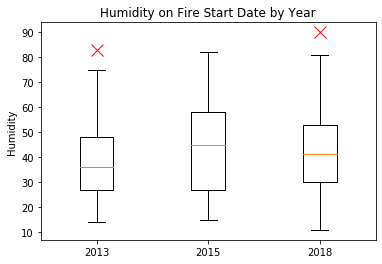

In [47]:

humidity_variables = [h_2013, h_2015, h_2018]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Humidity')
flierprops = dict(marker='x', markerfacecolor='r', markersize=12,
                 linestyle='none', markeredgecolor='r')
ax1.boxplot(humidity_variables, flierprops=flierprops)

plt.title("Humidity on Fire Start Date by Year")
plt.savefig("outputs/humidity_boxplot_2013.png")
fig1


ax1.set_xticklabels(["2013", "2015", "2018"])

In [48]:
sum2018 = weather_2018['Acres Burned'].sum()
sum2015= weather_2015['Acres Burned'].sum()
sum2013= weather_2013['Acres Burned'].sum()
print(sum2018)

1571239.0


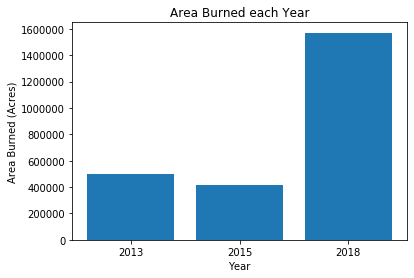

In [56]:
acreage_variables = [ sum2013, sum2015,sum2018]
years= ["2013", "2015", "2018"]

plt.title('Area Burned each Year')
plt.ylabel('Area Burned (Acres)')
plt.xlabel('Year')
fig = plt.bar(years, acreage_variables)
plt.savefig("outputs/acreage_barplot.png")
plt.show()




In [50]:
# We need to sort the data to determine which could be outliers
weather_variables = [weather_2013['Temperature'], weather_2013['Humidity'], weather_2013['Wind Speed'], weather_2013['Wind Gust']]
#weather_variables.sort()

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for fire size and start date
#print(f"The correlation coefficient between when a fire started in 2013 and the size of a fire in 2013 is {round(st.pearsonr(weather_2013['Date'],weather_2013['Acres Burned'])[0],2)}")

In [52]:
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(weather_2013['Date'],weather_2013['Acres Burned'])
m_fit = m_slope * weather_2013['Date'] + m_int
plt.scatter(weather_2013['Date'],weather_2013['Acres Burned'], marker="o", facecolors="red")
plt.plot(weather_2013['Date'],vc_fit,"--")
plt.ylim(34,47)
plt.xlim(14,26)
plt.title("Date Fire Started vs Size of Fire by Acres Burned 2013")
plt.xlabel("Date Fire Started")
plt.ylabel("Acres Burned")

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')